In [39]:
import sys
import os

import numpy as np
# needed for some matrix manipulations
from numpy import linalg, matlib
# save, import and load data
from numpy import asarray, save, load

import matplotlib.pyplot as plt
# for plots
import seaborn
#using scipy.stats:
from scipy import stats
# # to get date for saving data
from datetime import date    


# set up seaborn for the plots
seaborn.set()


In [40]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [41]:
# change directory to specified path
# FILENAMES TO CHANGE
path = '/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/data/2020-09-30_sigbk_sweep'
date = '2020-09-30'
param_file = date + '_BRAIN_ADAPT_True_BRAIN_RATE_0.006_DEC_ADAPT_True_K_RATE_0.006_A_RATE_0.006_SIGMA_B_0.5_SIGMA_K_0.5_Parameters.npz'
NUM_DIM = 1
NUM_NEURONS = 1

sig_b_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
sig_d_list = sig_b_list
NUM_SIG_B = len(sig_b_list)

os.chdir(path)
os.getcwd()

'/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/data/2020-09-30_sigbk_sweep'

In [42]:
cost_start_path = '_Trial_cost_start_data.npy'
targ_path = '_Trial_target_data.npy'
cursor_st_path = '_Trial_cursor_start_data.npy'
k_path = '_Decoder_K_data.npy'
lambda_path = '_Brain_lambda_data.npy'

In [43]:
# any paramters file is fine

parameters=np.load(param_file)
NUM_TRIALS = parameters['num_trials']
NUM_SESSIONS = parameters['num_sessions']
DEC_ADAPT = parameters['decoder_adapt']
BRAIN_ADAPT = parameters['brain_adapt']
NUM_B_RATES = parameters['num_b_rate']
B_RATE_LIST = parameters['b_rate_list']
NUM_D_RATES = parameters['num_d_rate']
D_RATE_LIST = parameters['d_rate_list']
NUM_LAMBDA = NUM_DIM + 1

# np.savez(filename + '_Parameters.npz', num_trials=NUM_TRIALS, num_sessions=NUM_SESSIONS, 
#          decoder_adapt=DECODER_ADAPT, brain_adapt=BRAIN_ADAPT, brain_rate=lambda_rate, 
#          k_rate=K_RATE, a_rate=A_RATE, num_b_rate=NUM_B_RATE, num_d_rate=NUM_D_RATE, b_rate_list=rate_list, d_rate_list=dec_rate_list)

print("Number of Trials = " + str(NUM_TRIALS))
print("Number of Sessions = " + str(NUM_SESSIONS))
print("")
print("Number of Brain Rates = " + str(NUM_B_RATES))
print("Brain Rates = " + str(B_RATE_LIST))
print("")
print("Number of Decoder Rates = " + str(NUM_D_RATES))
print("Decoder Rates = " + str(D_RATE_LIST))

Number of Trials = 500
Number of Sessions = 1

Number of Brain Rates = 1
Brain Rates = [0.006]

Number of Decoder Rates = 1
Decoder Rates = [0.006]


In [44]:
path_B = np.empty(NUM_B_RATES, dtype='<U256')
path_D = np.empty(NUM_D_RATES, dtype='<U256')
path_sig_b = np.empty(NUM_SIG_B, dtype='<U256')

# rate_B = np.empty(NUM_B_RATES)
# rate_D = np.empty(NUM_D_RATES)

path = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_SIG_B], dtype='<U256')
# rates = np.empty([NUM_B_RATES, NUM_D_RATES, 2])

cost_start = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_SIG_B, NUM_TRIALS, NUM_SESSIONS])
mean_cost = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_SIG_B])
mean_cost_last = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_SIG_B])
targ = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_SIG_B, NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS])
cursor_st = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_SIG_B, NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS])
k_data = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_SIG_B, NUM_DIM, NUM_NEURONS, NUM_TRIALS, NUM_SESSIONS])
lambda_data = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_SIG_B, NUM_NEURONS, NUM_LAMBDA, NUM_TRIALS, NUM_SESSIONS])

## From BMIModel_AdaptiveDecoder Code:
# cursor_start = np.zeros( (NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS) )
# cursor_end = np.zeros( (NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS) )
# # Note to self: last NUM_TRIALS element of target_trial is not run
# target_trial = np.zeros( (NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS) )
# lambda_trial = np.zeros( (NUM_NEURONS, NUM_LAMBDA, NUM_TRIALS, NUM_SESSIONS) )
# fr_trial = np.zeros( (NUM_NEURONS, 1, NUM_TRIALS) )
# a_trial = np.zeros( (NUM_DIM, NUM_TRIALS, NUM_SESSIONS) )
# k_trial = np.zeros( (NUM_DIM, NUM_NEURONS, NUM_TRIALS, NUM_SESSIONS) )
# re_startT = np.zeros( (NUM_TRIALS, NUM_SESSIONS) )
# re_endT = np.zeros( (NUM_TRIALS, NUM_SESSIONS) )

In [45]:
# Need to list out the paths, there's probably a more clever way
# rate list: [3.16227766e-04 1.00000000e-04 3.16227766e-05 1.00000000e-05 3.16227766e-06 1.00000000e-06]

# 2020-09-28_BRAIN_ADAPT_True_BRAIN_RATE_3_DEC_ADAPT_True_K_RATE_3_A_RATE_3_SIGMA_B_0.75_SIGMA_K_0.75_Trial_cursor_start_data
for iB in range(NUM_B_RATES):
    path_B[iB] = '_BRAIN_ADAPT_' + str(BRAIN_ADAPT) + '_BRAIN_RATE_' + str(B_RATE_LIST[iB])
    
for iD in range(NUM_D_RATES):
    path_D[iD] = '_DEC_ADAPT_' + str(DEC_ADAPT) + '_K_RATE_' + str(D_RATE_LIST[iD]) + '_A_RATE_' + str(D_RATE_LIST[iD])
    
for iS in range(NUM_SIG_B):
    path_sig_b[iS] = '_SIGMA_B_' + str(sig_b_list[iS]) + '_SIGMA_K_' + str(sig_b_list[iS])
    
    
for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        for iS in range(NUM_SIG_B):
            path[iB, iD, iS] = '' + date + path_B[iB] + path_D[iD] + path_sig_b[iS]


In [55]:
lastNum = 300

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        for iS in range(NUM_SIG_B):
            cost_start[iB, iD, iS] = np.load(path[iB, iD, iS] + cost_start_path)
            mean_cost[iB, iD, iS] = np.mean(cost_start[iB, iD, iS])
            mean_cost_last[iB, iD, iS] = np.mean(cost_start[iB, iD, iS, NUM_TRIALS-lastNum-1: NUM_TRIALS-1, :])
            targ[iB, iD, iS, :, :, :, :] = np.load(path[iB, iD, iS] + targ_path)
            cursor_st[iB, iD, iS, :, :, :, :] = np.load(path[iB, iD, iS] + cursor_st_path)
            k_data[iB, iD, iS, :, :, :, :] = np.load(path[iB,iD, iS] + k_path)
            lambda_data[iB, iD, iS, :, :, :, :] = np.load(path[iB, iD, iS] + lambda_path)

In [56]:
print(np.shape(mean_cost))

(1, 1, 10)


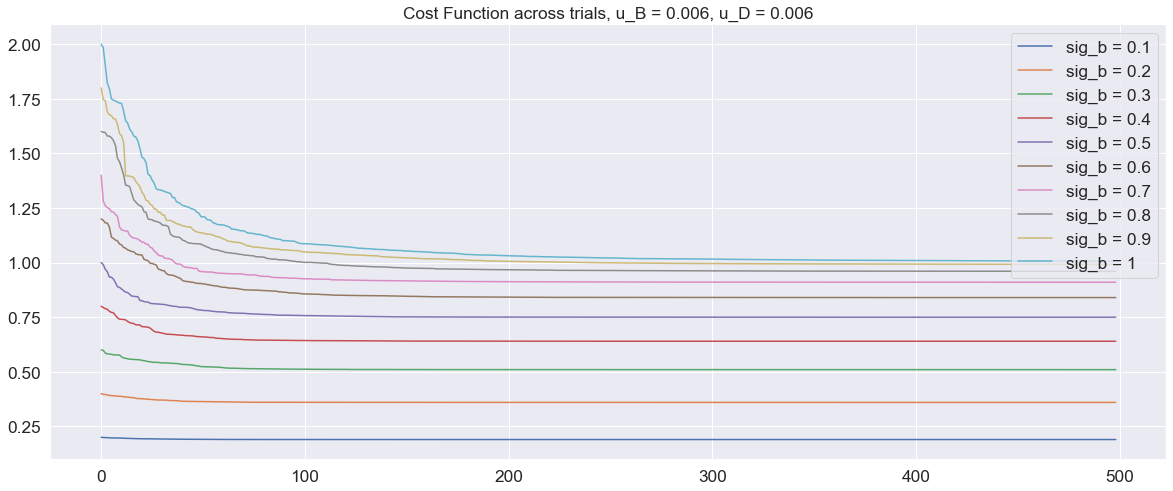

Mean: 0.1900233970366645
Last 300 Trials: 0.1900032959038988

Mean: 0.361041420586903
Last 300 Trials: 0.3600060106675959

Mean: 0.5138321557811897
Last 300 Trials: 0.51001310259286

Mean: 0.6463626477909569
Last 300 Trials: 0.6400307012054111

Mean: 0.7597693938210446
Last 300 Trials: 0.7500948812406248

Mean: 0.8604612008903394
Last 300 Trials: 0.8402329123758195

Mean: 0.93068089191978
Last 300 Trials: 0.9106280938857848

Mean: 1.0006033187106107
Last 300 Trials: 0.9618764140037501

Mean: 1.0427866473585634
Last 300 Trials: 0.995425999370074

Mean: 1.0788216191936018
Last 300 Trials: 1.0141216277768828



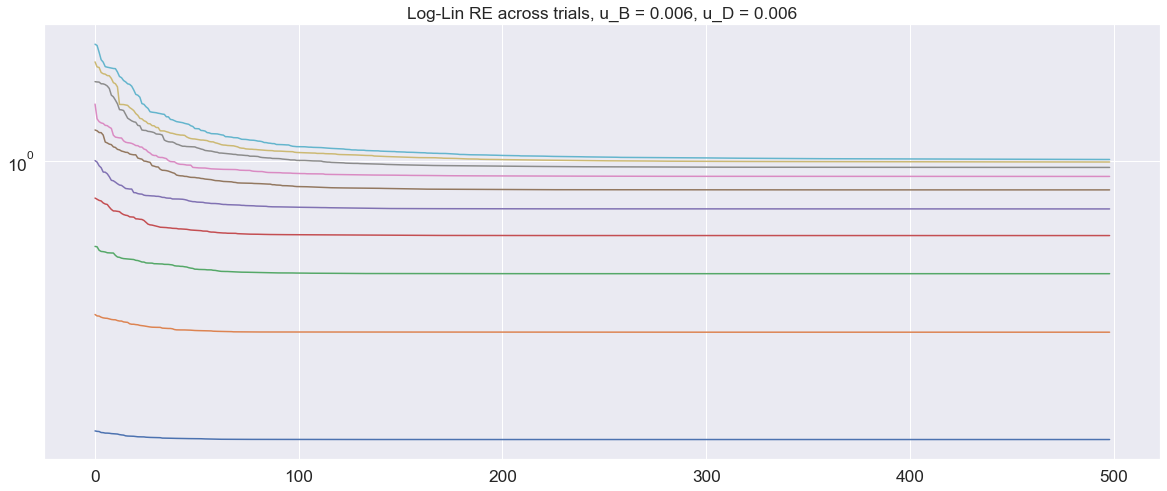

In [57]:
uB_idx = 0
uD_idx = 1

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        for iS in range(NUM_SIG_B):
            plt.plot(cost_start[iB, iD, iS, :-1], label = 'sig_b = ' + str(sig_b_list[iS]))
        plt.title('Cost Function across trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.legend()
        plt.show()
            
for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        for iS in range(NUM_SIG_B):
            print("Mean: " + str(mean_cost[iB, iD, iS]))
            print("Last " + str(lastNum) + " Trials: " + str(mean_cost_last[iB, iD, iS]))
            print("")
            # plots with log scaling on the y-axis -- so this plots x vs log_10(y)
            plt.semilogy(cost_start[iB, iD, iS, :-1])
            plt.title('Log-Lin RE across trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.show()
        


In [49]:
# print(mean_cost_last)

# ax = seaborn.heatmap(mean_cost_last, annot=True, fmt='.2g', xticklabels=D_RATE_LIST, yticklabels=B_RATE_LIST)
# ax.set(xlabel="uD", ylabel = "uB")
# # y = uB, x = uD

print(np.shape(cost_start))

(1, 1, 10, 500, 1)


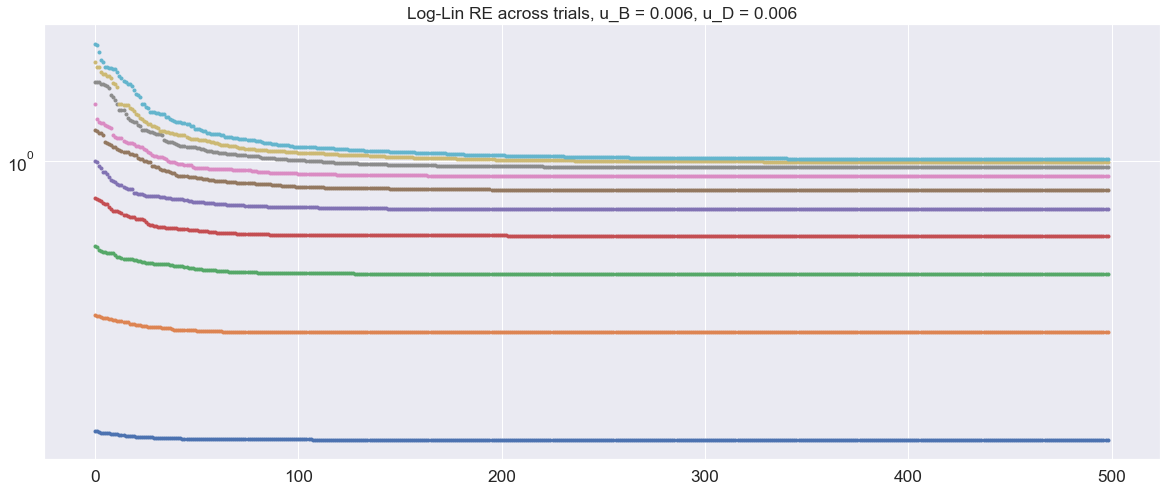

In [50]:
# Same plots as above, but looking at the linear portion of the log curve only
uB_idx = 0
uD_idx = 1

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        for iS in range(NUM_SIG_B):
            plt.semilogy(cost_start[iB, iD, iS,:, :], '.')
        
        plt.title('Log-Lin RE across trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.show()

In [51]:
# from: http://bagrow.info/dsv/LEC10_notes_2014-02-13.html
def linregress_CIs(xd,yd,conf=0.95):
    """Linear regression CIs FTW!"""
    alpha=1.-conf   # significance
    n = xd.size   # data sample size
    x = np.linspace(xd.min(),xd.max(),100)
        
    # Predicted values from fitted model:
    a, b, r, p, err = stats.linregress(xd,yd)
    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    sd = np.sqrt(sd)
    sxd = np.sum((xd-xd.mean())**2)
    sx  = (x-xd.mean())**2
    
    # quantile of student's t distribution for p=1-alpha/2
    q = stats.t.ppf(1.-alpha/2, n-2)
    
    # get the upper and lower CI:
    dy = q*sd*np.sqrt( 1./n + sx/sxd )
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x

u_B = 0.006, u_D = 0.006, sigma_b = 0.1, sigma_k = 0.1
distribution: 
slope = -0.0004731738519795814
intercept = -0.7022401575755761
r-squared = 0.9328137648058803
p-value = 6.947699387551402e-24
std error = 2.0600208630791563e-05
u_B = 0.006, u_D = 0.006, sigma_b = 0.2, sigma_k = 0.2
distribution: 
slope = -0.0009294693522303304
intercept = -0.4030876619284331
r-squared = 0.9669571823976818
p-value = 9.518793064205374e-30
std error = 2.7872645458890665e-05
u_B = 0.006, u_D = 0.006, sigma_b = 0.3, sigma_k = 0.3
distribution: 
slope = -0.00113840359546997
intercept = -0.23210912397306424
r-squared = 0.9196108001521294
p-value = 2.1144698785092872e-22
std error = 5.4601086133389546e-05
u_B = 0.006, u_D = 0.006, sigma_b = 0.4, sigma_k = 0.4
distribution: 
slope = -0.0020410692957487167
intercept = -0.10568886313567272
r-squared = 0.9614103052771205
p-value = 1.820781148438119e-28
std error = 6.633568776571475e-05
u_B = 0.006, u_D = 0.006, sigma_b = 0.5, sigma_k = 0.5
distribution: 
slope 

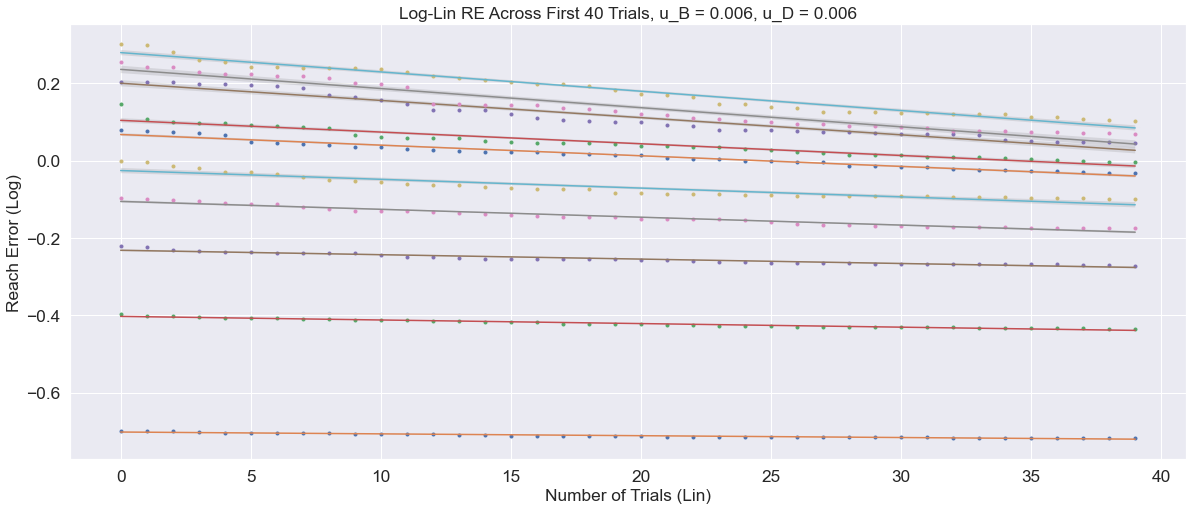

In [52]:
x_limit = 40
x_axis = np.arange(0, x_limit , 1)
slope = np.zeros([NUM_B_RATES, NUM_D_RATES, NUM_SIG_B])

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        for iS in range(NUM_SIG_B):
            y_plot = np.log10(np.mean(cost_start[iB, iD, iS, 0:x_limit, :], 1))
            plt.plot(x_axis, y_plot, '.')
            slope[iB, iD, iS], intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_plot)
            y_fit = slope[iB, iD, iS]*x_axis + intercept
            plt.plot(x_axis, y_fit)
            ci = 1.96 * std_err
            yl,yu,xd = linregress_CIs(x_axis, y_plot)
            plt.fill_between(xd, yl, yu, alpha=0.2, facecolor='gray',edgecolor='none')
            print("========================================================")
            print("u_B = " + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]) 
                  + ", sigma_b = " + str(sig_b_list[iS]) + ", sigma_k = " + str(sig_b_list[iS]))
            print("distribution: ")
            print("slope = " + str(slope[iB, iD, iS]))
            print("intercept = " + str(intercept))
            print("r-squared = " + str(r_value**2))
            print("p-value = " + str(p_value))
            print("std error = " + str(std_err))
            print("========================================================")

        plt.title('Log-Lin RE Across First ' + str(x_limit) + ' Trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.xlabel("Number of Trials (Lin)")
        plt.ylabel("Reach Error (Log)")
        plt.show()
#         seaborn.regplot(x_axis, y_plot, 1)
#         plt.show()        
    

        

In [53]:
for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        print( "u_B = " + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]) + '| Slope = ' + str(slope[iB, iD]) )

u_B = 0.006, u_D = 0.006| Slope = [-0.00047317 -0.00092947 -0.0011384  -0.00204107 -0.00227004 -0.00275011
 -0.00302828 -0.004449   -0.00495266 -0.00499579]


In [ ]:
print(slope)
# print("")
# print(B_RATE_LIST)
# print("")
# print(np.log10(B_RATE_LIST))

# plt.plot(np.log10(B_RATE_LIST[1:10]), slope[1:10], '.')

In [ ]:
# x_limit = 100
# x_axis = np.arange(0, x_limit , 1)

# for iB in range(NUM_B_RATES):
#     for iD in range(NUM_D_RATES):
#         y_plot = np.log10(np.mean(cost_start[iB, iD, 0:x_limit, :], 1))
#         plt.plot(x_axis, y_plot, '.')
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_plot)
#         y_fit = slope*x_axis + intercept
#         plt.plot(x_axis, y_fit)
#         ci = 1.96 * std_err
#         yl,yu,xd = linregress_CIs(x_axis, y_plot)
#         plt.fill_between(xd, yl, yu, alpha=0.2, facecolor='gray',edgecolor='none')
#         plt.title('Log-Lin RE Across Trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
#         plt.xlabel("Number of Trials (Lin)")
#         plt.ylabel("Reach Error (Log)")
#         plt.show()
# #         seaborn.regplot(x_axis, y_plot, 1)
# #         plt.show()        
#         print("slope = " + str(slope))
#         print("intercept = " + str(intercept))
#         print("r-squared = " + str(r_value**2))
#         print("p-value = " + str(p_value))
#         print("std error = " + str(std_err))
#         print("========================================================")


# Stationary Points of K/W

In [59]:
def calcStationaryCost(sig, tau):
    k = np.sqrt(1 - sig/(tau**2))
    w = np.sqrt(1 - sig/(tau**2))
    return (tau - k*w*tau)**2 + sig*(k**2) + sig*(w**2)
    
for iS in sig_b_list:
    print("sig_b = " + str(iS) + " | " + str(calcStationaryCost(iS, 1)))

sig_b = 0.1 | 0.19
sig_b = 0.2 | 0.36000000000000004
sig_b = 0.3 | 0.51
sig_b = 0.4 | 0.64
sig_b = 0.5 | 0.75
sig_b = 0.6 | 0.84
sig_b = 0.7 | 0.91
sig_b = 0.8 | 0.96
sig_b = 0.9 | 0.99
sig_b = 1 | 1.0
